In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import zipfile

%matplotlib inline

In [2]:
os.chdir('../Data')
os.listdir()

['.ipynb_checkpoints',
 'header_word_docs',
 'links to data sets.txt',
 'State-Individual-Income-Tax-Rates-and-Brackets-for-2020-U.xlsx',
 'supplemental_data',
 'tax_data_2014.txt',
 'tax_data_2015.txt',
 'tax_data_2016.txt',
 'tax_data_2017.txt',
 'tax_data_2018.txt',
 'tax_data_master.xlsx',
 'year_2014.csv',
 'year_2015.csv',
 'year_2016.csv',
 'year_2017.csv',
 'year_2018.csv',
 'ZIP-COUNTY-FIPS.txt',
 '~$aders_2014.docx']

In [143]:
# get all csvs from current directory
csvs = [x for x in os.listdir('.') if x.endswith('.csv')]

# extract name from each csv
files_names = [os.path.splitext(os.path.basename(x))[0] for x in csvs]

# create dictionary of datframes for importing into db
tax_dictionary = {}
for i in range(len(files_names)):
    tax_dictionary[files_names[i]] = pd.read_csv(csvs[i])

In [144]:
tax_df = pd.concat([tax_dictionary['year_2014'],
                   tax_dictionary['year_2015'],
                   tax_dictionary['year_2016'],
                   tax_dictionary['year_2017'],
                   tax_dictionary['year_2018']],
                  join='inner')

In [145]:
tax_df = tax_df.rename(columns=str.lower)
tax_df.columns = tax_df.columns.str.replace(' ', '_')

In [146]:
tax_df = tax_df[(tax_df['zipcode'] != 0)]
tax_df = tax_df[(tax_df['zipcode'] != 99999)]

In [147]:
del(tax_dictionary)

In [152]:
tax_df.describe()

,year,zipcode,number_of_returns,number_of_single_returns,number_of_joint_returns,number_of_head_of_household_returns,number_of_returns_with_paid_preparer's_signature,number_of_dependents,number_of_returns_with_total_income,total_income_amount,...,refundable_education_credit_amount,number_of_returns_with_net_premium_tax_credit,net_premium_tax_credit_amount,number_of_returns_with_tax_liability,number_of_returns_with_additional_medicare_tax,additional_medicare_tax_amount,number_of_returns_with_net_investment_income_tax,net_investment_income_tax_amount,number_of_returns_with_tax_due_at_time_of_filing,number_of_returns_with_overpayments_refunded
count,843230.00000,843230.000000,843230.000000,843230.000000,843230.000000,843230.000000,843230.000000,843230.000000,843230.000000,8.432300e+05,...,843230.000000,843230.000000,843230.000000,843230.000000,843230.000000,843230.000000,843230.000000,843230.000000,843230.000000,843230.000000
mean,2015.99937,48944.386393,861.523582,406.598413,312.432302,125.582629,461.102036,549.861200,861.522835,6.185437e+04,...,44.909951,11.066305,7.468472,661.320091,20.771687,44.470452,22.769968,112.311837,170.357566,651.965300
std,1.40314,27108.648171,1553.532940,940.421150,519.790929,354.670960,855.021743,1102.782385,1553.530927,1.926781e+05,...,107.682381,47.659609,25.895422,1072.034175,153.576849,487.352866,162.468418,1621.748468,287.695402,1271.903026
min,2014.00000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.00000,27043.000000,60.000000,0.000000,40.000000,0.000000,40.000000,40.000000,60.000000,3.951000e+03,...,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,2016.00000,48890.000000,230.000000,60.000000,110.000000,20.000000,140.000000,140.000000,230.000000,1.484700e+04,...,0.000000,0.000000,0.000000,190.000000,0.000000,0.000000,0.000000,0.000000,50.000000,160.000000
75%,2017.00000,70728.250000,950.000000,310.000000,370.000000,80.000000,520.000000,560.000000,950.000000,5.911400e+04,...,43.000000,0.000000,0.000000,800.000000,0.000000,0.000000,0.000000,0.000000,200.000000,660.000000
max,2018.00000,99929.000000,37090.000000,21160.000000,12700.000000,9870.000000,29640.000000,28420.000000,37090.000000,1.318729e+07,...,5030.000000,3750.000000,850.000000,20660.000000,7220.000000,35769.000000,8040.000000,248211.000000,13310.000000,26770.000000


<AxesSubplot:xlabel='number_of_returns', ylabel='state'>

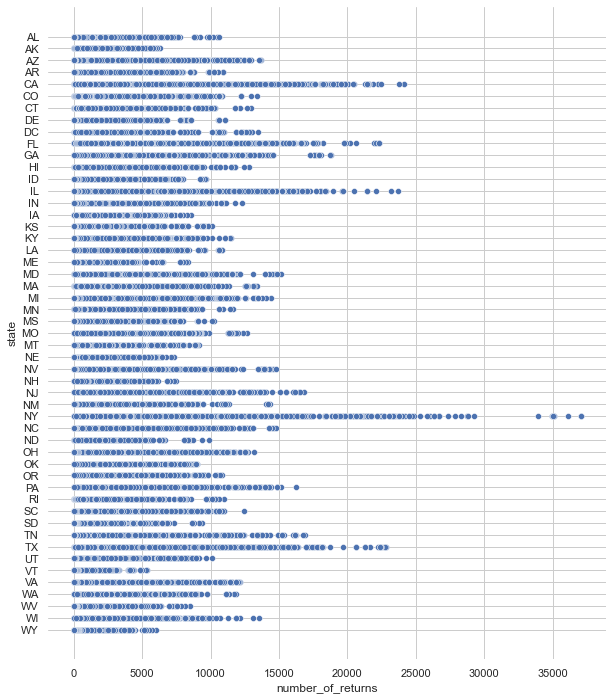

In [191]:
sns.set_theme(style='whitegrid')

f, ax = plt.subplots(figsize=(10, 12))

sns.despine(f, left=True, bottom=True)
sns.scatterplot(data=tax_df,
                x='number_of_returns',
                y='state',
               )

In [199]:
tax_df['number_of_returns'].groupby(tax_df['state']).sum().sort_values(ascending=False)

state
CA    85984800
TX    59187900
FL    47288040
NY    47131540
PA    30324250
IL    30147040
OH    27529110
MI    23141620
NC    21858660
GA    21747750
NJ    21617640
VA    19204730
WA    16890030
MA    16700850
IN    15271630
TN    14619300
MD    14574770
WI    13984860
AZ    13858320
MO    13665170
MN    13485640
CO    12713810
SC    10619210
AL     9986590
LA     9555110
KY     9305100
OR     9091570
CT     8640320
OK     7840240
IA     7104080
NV     6572960
KS     6517010
UT     6064700
MS     5978090
AR     5899100
NE     4390050
NM     4174390
WV     3646580
ID     3551960
NH     3408270
HI     3195640
ME     3150400
RI     2604020
MT     2323900
DE     2239690
SD     2006150
ND     1744390
DC     1689690
VT     1557650
AK     1413100
WY     1265110
Name: number_of_returns, dtype: int64

In [188]:
tax_df['zipcode'].nunique()

29999

In [209]:
tax_df[['year', 'state',
        'number_of_single_returns', 
        'number_of_joint_returns',
        'number_of_returns',
        'number_of_head_of_household_returns']].groupby(tax_df['state']).sum()

,year,number_of_single_returns,number_of_joint_returns,number_of_returns,number_of_head_of_household_returns
state,,,,,
AK,4427142,713850,521070,1413100,144230
AL,34955406,4071090,3714390,9986590,2012480
AR,29742057,2403330,2359400,5899100,1020340
AZ,18758880,6300000,5133470,13858320,2249260
CA,91159359,41697210,30582770,85984800,12521350
CO,24480258,6213830,4884780,12713810,1379030
CT,15978828,4275830,3078260,8640320,1118020
DC,1330560,1087680,283830,1689690,269350
DE,3433248,1061870,791900,2239690,333540


In [202]:
tax_df.columns

Index(['year', 'state', 'zipcode', 'number_of_returns',
       'number_of_single_returns', 'number_of_joint_returns',
       'number_of_head_of_household_returns',
       'number_of_returns_with_paid_preparer's_signature',
       'number_of_dependents', 'number_of_returns_with_total_income',
       'total_income_amount', 'number_of_returns_with_salaries_and_wages',
       'salaries_and_wages_amount', 'number_of_returns_with_taxable_interest',
       'taxable_interest_amount', 'number_of_returns_with_ordinary_dividends_',
       'ordinary_dividends_amount',
       'number_of_returns_with_qualified_dividends',
       'number_of_returns_with_state_and_local_income_tax_refunds',
       'state_and_local_income_tax_refunds_amount',
       'number_of_returns_with_business_or_professional_net_income_(less_loss)',
       'business_or_professional_net_income_(less_loss)_amount',
       'number_of_returns_with_net_capital_gain_(less_loss)',
       'net_capital_gain_(less_loss)_amount', 'number_of

There is not nested data, however, using the inner join to append the data into one set revealed that all columns do not match over the years. The result is a dataset that has 89 columns and ~843k records. 